In [70]:
import pandas as pd             # data package
import matplotlib.pyplot as plt # graphics 
import datetime as dt
import numpy as np
import matplotlib.dates as mdates

# these are new 
import requests, io             # internet and input tools  
import zipfile as zf            # zip file tools 
import shutil                   # file management tools 
import os                       # operating system tools (check files)

In [71]:
df = pd.read_csv("https://github.com/nytimes/covid-19-data/raw/master/us-counties.csv")

nyc = df.county == "New York City"
df.loc[nyc,"fips"] = 36061

df["date"] = pd.to_datetime(df["date"], format = "%Y-%m-%d")

In [72]:
grp = df.groupby(["fips"])

In [111]:
def plot_time_county(df):
    
    plt.style.use('ggplot')
    
    fig, ax = plt.subplots(1,1,figsize = (7,4))

    mike_blue = tuple(np.array([20, 64, 134]) / 255)

    ax.plot(df.date,df.cases.diff(1).rolling(7).mean(), alpha = 0.99, color = "firebrick", linewidth = 3
           , label = "7 day moving average")

    ax.bar(df.date,df.cases.diff(1), alpha = 0.80, color = "red")

    ax.set_xlim(dt.datetime(2020,3,1),dt.datetime(2020,5,5))
    
    ax.set_ylim(0,)

    ax.spines["right"].set_visible(False)

    ax.spines["top"].set_visible(False)

    ax.set_ylabel("New Covid-19 Cases", fontsize = 10)
    
    ax.legend(loc='upper left', frameon=False)

#https://matplotlib.org/3.1.0/gallery/ticks_and_spines/date_concise_formatter.html
# makes the dates more concise
    locator = mdates.AutoDateLocator(minticks=3, maxticks=10)
    formatter = mdates.ConciseDateFormatter(locator)
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)

    place = df.county.iloc[0] + " County, " + df.state.iloc[0]

    plt.title(place, fontsize = 12, loc= "center")

    file_path = os.getcwd()

    doc_path = file_path + "\\docs"

    outfp = doc_path + "\\county_" + str(df.fips.iloc[0].astype(int)) + ".png"
    #print(outfp)
    plt.savefig(outfp, bbox_inches = "tight", dip = 1200)
    plt.close(fig)
    #plt.show()

In [86]:
dftest = grp.get_group(27053)

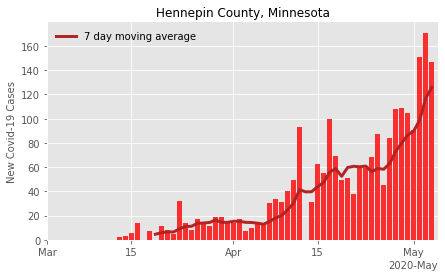

In [110]:
plot_time_county(dftest)

In [112]:
plt.ioff()

grp.apply(plot_time_county)

""
